<a href="https://colab.research.google.com/github/IsaacFigNewton/CSC-480/blob/main/Lab6_480_Rudnick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 6 – Day 1: Decision Trees on the Breast Cancer Dataset
Dataset


- We will use the Breast Cancer Wisconsin dataset, a built-in dataset from sklearn.datasets.

- It contains 30 features computed from digitized images of a breast mass and a binary target: malignant or benign.


Lab Tasks
1. Setup

In [ ]:
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

2. Load and Explore the Data

In [ ]:
data = load_breast_cancer()

X, y = data.data, data.target

print("Features:", data.feature_names)

print("Target names:", data.target_names)

print("Shape:", X.shape)


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Shape: (569, 30)


3. Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Train the Decision Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

5. Visualize the Tree

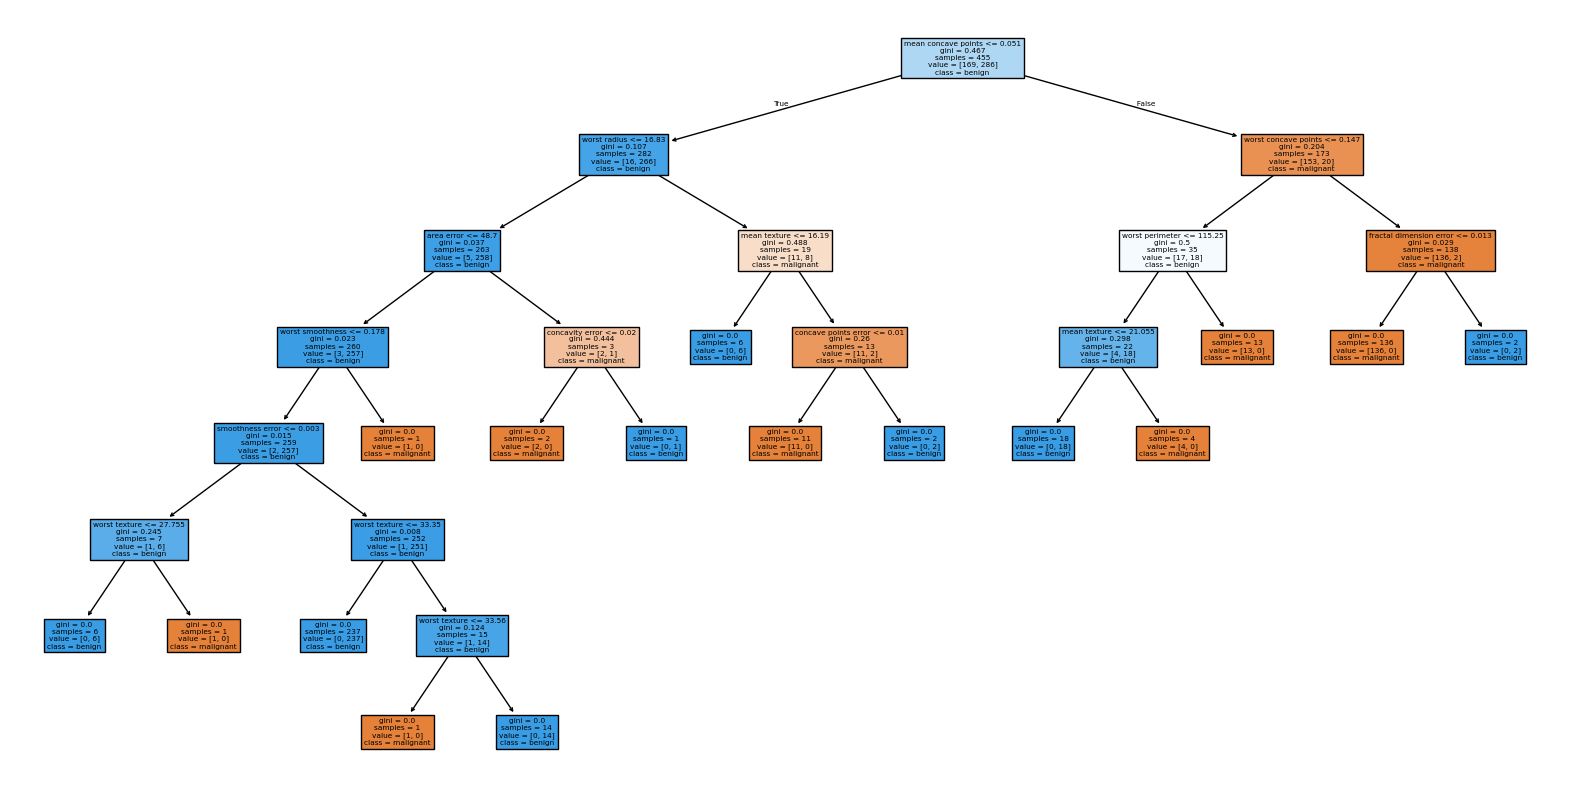

In [ ]:
plt.figure(figsize=(20,10))

plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)

plt.show()


6. Evaluate the Classifier

Testing Accuracy: 0.9473684210526315
Training Accuracy: 1.0


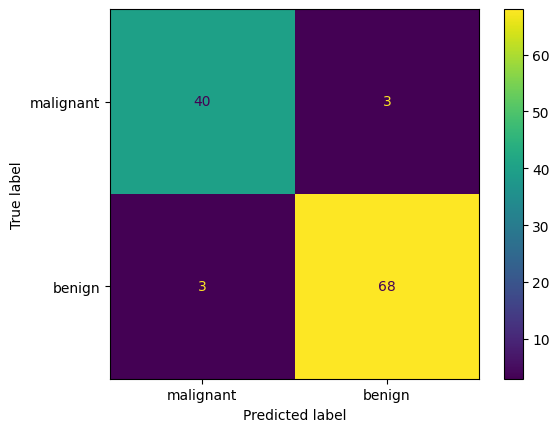

In [ ]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Testing Accuracy:", acc)

y_pred2 = clf.predict(X_train)

acc = accuracy_score(y_train, y_pred2)

print("Training Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

disp.plot()

plt.show()


Answer the accompanying reflection Questions

Lab 6 – Day 2: Feedforward Neural Networks on Fashion MNIST


Objective
- Train a dense (non-convolutional) neural network on image data using TensorFlow/Keras to classify clothing items.

Setup
- Requirements: Google Colab (no setup required, TensorFlow is pre-installed)

Dataset: Fashion MNIST
- A set of grayscale images (28×28) of clothing types.

Classes:

0: T-shirt/top


1: Trouser


2: Pullover


3: Dress


4: Coat


5: Sandal


6: Shirt


7: Sneaker


8: Bag


9: Ankle boot


1. Import Libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


2. Load and Normalize Data

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize to [0, 1]


3. Visualize the Dataset

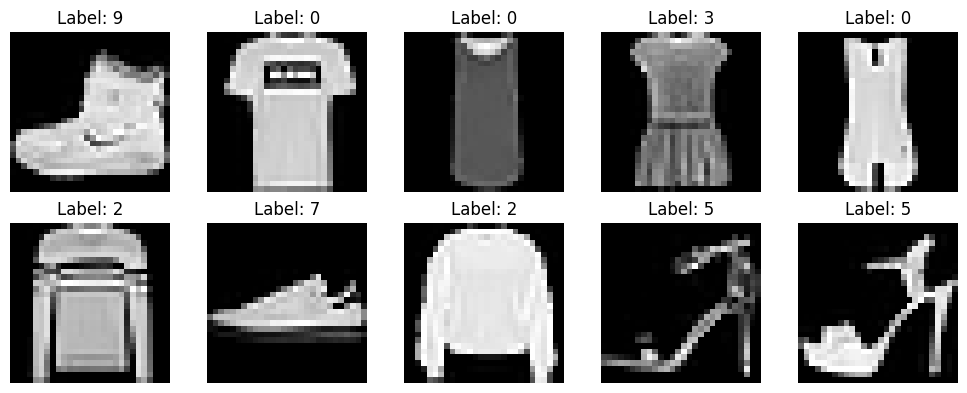

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(20):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


4. Build a Feedforward Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


5. Compile and Train

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7809 - loss: 0.6324 - val_accuracy: 0.8482 - val_loss: 0.4168
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8594 - loss: 0.3953 - val_accuracy: 0.8623 - val_loss: 0.3688
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8718 - loss: 0.3481 - val_accuracy: 0.8702 - val_loss: 0.3563
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8811 - loss: 0.3156 - val_accuracy: 0.8762 - val_loss: 0.3396
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8904 - loss: 0.2960 - val_accuracy: 0.8808 - val_loss: 0.3291
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8976 - loss: 0.2774 - val_accuracy: 0.8832 - val_loss: 0.3329
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8974 - loss: 0.2704 - val_accuracy: 0.8805 - val_loss: 0.3263
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9023 - loss: 0.2611 -

6. Evaluate the Model

test set accuracies:
- relu: 0.8816
- sigmoid: 0.8779
- tanh:
- leaky_relu:
- linear:
- log_sigmoid:
- log_softmax

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8761 - loss: 0.3593
Test Accuracy: 0.8779


7. Plot Learning Curves

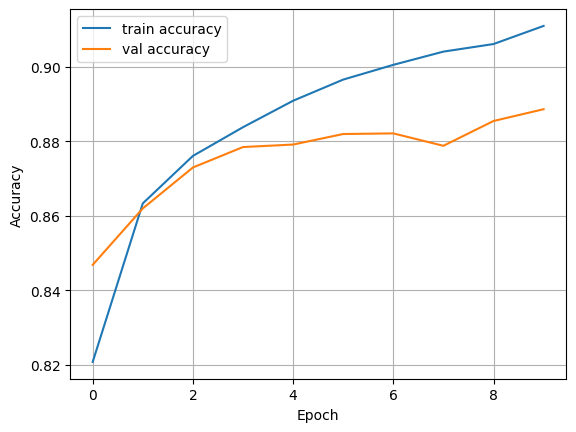

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Answer Reflection Questions

In [ ]:
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

In [ ]:
def try_diff_activation_functions(activation_functions):
    test_accs = dict()
    for activation in activation_functions:
      model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(128, activation=activation),
          keras.layers.Dense(10, activation='softmax')
      ])
      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

      history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

      test_loss, test_acc = model.evaluate(X_test, y_test)
      test_accs[activation] = {
          "loss_decrease_rate": history.history['val_loss'][-1] - history.history['val_loss'][0],
          "accuracy": test_acc
      }

    return test_accs

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7771 - loss: 0.6417 - val_accuracy: 0.8492 - val_loss: 0.4167
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8590 - loss: 0.3880 - val_accuracy: 0.8680 - val_loss: 0.3657
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8787 - loss: 0.3366 - val_accuracy: 0.8672 - val_loss: 0.3678
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8860 - loss: 0.3155 - val_accuracy: 0.8785 - val_loss: 0.3391
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8885 - loss: 0.2986 - val_accuracy: 0.8865 - val_loss: 0.3310
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8988 - loss: 0.2704 - val_accuracy: 0.8767 - val_loss: 0.3421
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8988 - loss: 0.2699 - val_accuracy: 0.8840 - val_loss: 0.3302
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9023 - loss: 0.2587 -

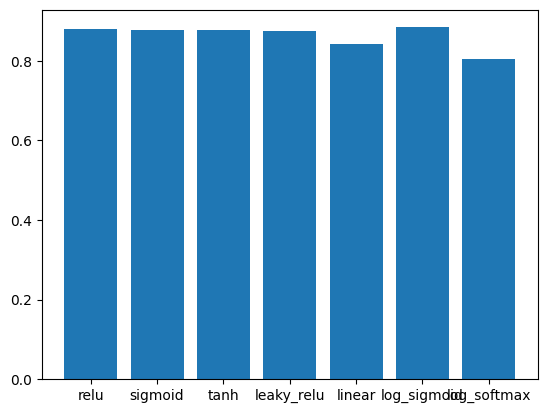

In [ ]:
activation_fn_test_accs = try_diff_activation_functions(['relu', 'sigmoid', 'tanh', 'leaky_relu', 'linear', 'log_sigmoid', 'log_softmax'])
plt.bar(activation_fn_test_accs.keys(), [v["accuracy"] for v in activation_fn_test_accs.values()])
plt.show()

In [ ]:
import json
print(json.dumps(activation_fn_test_accs, indent=4))

{
    "relu": {
        "loss_decrease_rate": -0.08788806200027466,
        "accuracy": 0.8791000247001648
    },
    "sigmoid": {
        "loss_decrease_rate": -0.09657469391822815,
        "accuracy": 0.8765000104904175
    },
    "tanh": {
        "loss_decrease_rate": -0.07412856817245483,
        "accuracy": 0.8773000240325928
    },
    "leaky_relu": {
        "loss_decrease_rate": -0.06497186422348022,
        "accuracy": 0.8748999834060669
    },
    "linear": {
        "loss_decrease_rate": -0.055494099855422974,
        "accuracy": 0.84170001745224
    },
    "log_sigmoid": {
        "loss_decrease_rate": -0.10126596689224243,
        "accuracy": 0.8841999769210815
    },
    "log_softmax": {
        "loss_decrease_rate": 0.013965129852294922,
        "accuracy": 0.804099977016449
    }
}


In [ ]:
try_diff_activation_functions(["softmax"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5600 - loss: 1.7650 - val_accuracy: 0.5807 - val_loss: 1.0943
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5941 - loss: 1.0252 - val_accuracy: 0.6148 - val_loss: 0.9013
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6157 - loss: 0.8752 - val_accuracy: 0.6392 - val_loss: 0.8336
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6688 - loss: 0.7818 - val_accuracy: 0.7170 - val_loss: 0.7120
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7263 - loss: 0.6755 - val_accuracy: 0.7325 - val_loss: 0.6571
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7375 - loss: 0.6337 - val_accuracy: 0.7407 - val_loss: 0.6339
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7502 - loss: 0.6110 - val_accuracy: 0.7473 - val_loss: 0.6187
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7524 - loss: 0.5991 - 

{'softmax': {'loss_decrease_rate': -0.4626014828681946,
  'accuracy': 0.7526000142097473}}

Lab 6 – Day 3: CNNs for Fashion MNIST

Objective

Introduce students to convolutional neural networks and show how they improve performance on image classification tasks by leveraging spatial structure.


Setup
- Platform: Google Colab (TensorFlow pre-installed)
- Dataset: Fashion MNIST (same as Day 2, but input needs reshaping for CNN)

1. Import Libraries


In [111]:
import tensorflow as tf

from tensorflow import keras

import matplotlib.pyplot as plt


2. Load and Preprocess Data

In [113]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape for CNN: (28,28) → (28,28,1)

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0

X_test = X_test.reshape(-1, 28, 28, 1) / 255.0


3. Build a Simple CNN

In [114]:
model = keras.Sequential([

    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(10, activation='softmax')

])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Compile and Train


In [115]:
model.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',

              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7552 - loss: 0.6657 - val_accuracy: 0.8733 - val_loss: 0.3499
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8774 - loss: 0.3411 - val_accuracy: 0.8827 - val_loss: 0.3161
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8946 - loss: 0.2872 - val_accuracy: 0.8982 - val_loss: 0.2786
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9068 - loss: 0.2492 - val_accuracy: 0.9038 - val_loss: 0.2679
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9207 - loss: 0.2145 - val_accuracy: 0.9112 - val_loss: 0.2500
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9290 - loss: 0.1942 - val_accuracy: 0.9138 - val_loss: 0.2471
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9365 - loss: 0.1741 - val_accuracy: 0.9135 - val_loss: 0.2399
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9407 - loss: 0.1585

5. Evaluate and Plot Learning Curve

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9077 - loss: 0.2994
Test Accuracy: 0.9072


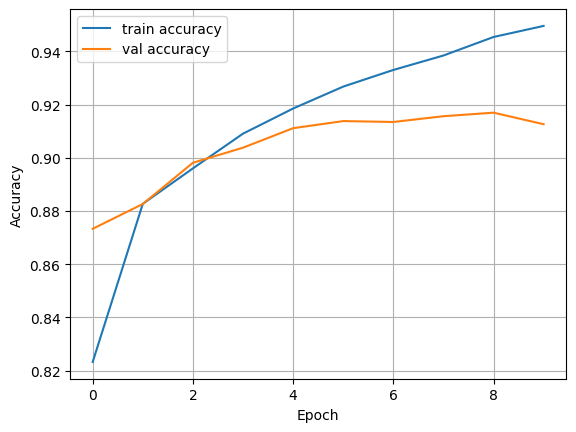

In [116]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='train accuracy')

plt.plot(history.history['val_accuracy'], label='val accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.grid(True)

plt.show()


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


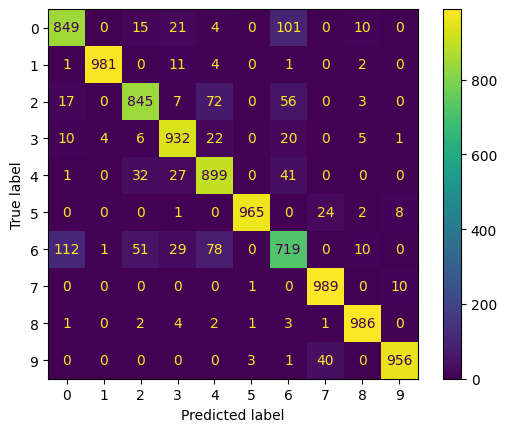

In [ ]:
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()


Question answering

In [121]:
def try_hyperparams(conv:dict, pool:tuple, fc: dict):
    model = keras.Sequential([

        keras.layers.Conv2D(conv["filters"], conv["kernel"], activation=conv["activation"], input_shape=(28, 28, 1)),

        keras.layers.MaxPooling2D(pool),

        keras.layers.Conv2D(2*conv["filters"], conv["kernel"], activation=conv["activation"]),

        keras.layers.MaxPooling2D(pool),

        keras.layers.Flatten(),

        keras.layers.Dense(fc["neuron"], activation=fc["activation"]),

        keras.layers.Dense(10, activation='softmax')

    ])


    model.compile(optimizer='adam',

                  loss='sparse_categorical_crossentropy',

                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    return test_acc

In [122]:
import pandas as pd

filters = [32, 64, 128]
kernels = [(2, 2), (3, 3)]
activations = ["relu", "log_sigmoid", "softmax"]
pools = [(2, 2), (3, 3)]
neurons = [32, 64, 128]

conv_hyperparams = list()
for f in filters:
    for k in kernels:
        for a in activations:
            conv_hyperparams.append({
                "filters": f,
                "kernel": k,
                "activation": a
            })
fc_hyperparams = list()
for n in neurons:
    for a in activations:
        fc_hyperparams.append({
            "neuron": n,
            "activation": a
        })
hyperparams = list()
for conv in conv_hyperparams:
    for pool in pools:
          for fc in fc_hyperparams:
              hyperparams.append((conv, pool, fc))

hyperparams = pd.DataFrame(hyperparams, columns=["conv", "pool", "fc"])

In [123]:
hyperparams.head()

,conv,pool,fc
0,"{'filters': 32, 'kernel': (2, 2), 'activation'...","(2, 2)","{'neuron': 32, 'activation': 'relu'}"
1,"{'filters': 32, 'kernel': (2, 2), 'activation'...","(2, 2)","{'neuron': 32, 'activation': 'log_sigmoid'}"
2,"{'filters': 32, 'kernel': (2, 2), 'activation'...","(2, 2)","{'neuron': 32, 'activation': 'softmax'}"
3,"{'filters': 32, 'kernel': (2, 2), 'activation'...","(2, 2)","{'neuron': 64, 'activation': 'relu'}"
4,"{'filters': 32, 'kernel': (2, 2), 'activation'...","(2, 2)","{'neuron': 64, 'activation': 'log_sigmoid'}"


In [ ]:
for i, row in hyperparams.iterrows():
    hyperparams.loc[i, "accuracy"] = try_hyperparams(row["conv"], row["pool"], row["fc"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7276 - loss: 0.7536 - val_accuracy: 0.8617 - val_loss: 0.3834
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8709 - loss: 0.3626 - val_accuracy: 0.8800 - val_loss: 0.3286
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8880 - loss: 0.3111 - val_accuracy: 0.8932 - val_loss: 0.2968
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8977 - loss: 0.2815 - val_accuracy: 0.8962 - val_loss: 0.2814
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9023 - loss: 0.2593 - val_accuracy: 0.9013 - val_loss: 0.2738
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9121 - loss: 0.2396 - val_accuracy: 0.9057 - val_loss: 0.2739
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9195 - loss: 0.2178 - val_accuracy: 0.9107 - val_loss: 0.2527
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9241 - loss: 0.2092 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7352 - loss: 0.7381 - val_accuracy: 0.8552 - val_loss: 0.3843
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8751 - loss: 0.3451 - val_accuracy: 0.8682 - val_loss: 0.3444
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8933 - loss: 0.2940 - val_accuracy: 0.8930 - val_loss: 0.2913
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9045 - loss: 0.2632 - val_accuracy: 0.8947 - val_loss: 0.2801
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9089 - loss: 0.2479 - val_accuracy: 0.8987 - val_loss: 0.2750
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9162 - loss: 0.2284 - val_accuracy: 0.9065 - val_loss: 0.2625
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9196 - loss: 0.2148 - val_accuracy: 0.9032 - val_loss: 0.2725
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9271 - loss: 0.1971 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4284 - loss: 1.7875 - val_accuracy: 0.5115 - val_loss: 1.1415
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5111 - loss: 1.0890 - val_accuracy: 0.5390 - val_loss: 0.9615
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5497 - loss: 0.9497 - val_accuracy: 0.6525 - val_loss: 0.8841
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7040 - loss: 0.8595 - val_accuracy: 0.7915 - val_loss: 0.7614
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7922 - loss: 0.7351 - val_accuracy: 0.8027 - val_loss: 0.6765
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8103 - loss: 0.6437 - val_accuracy: 0.8122 - val_loss: 0.6048
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8244 - loss: 0.5770 - val_accuracy: 0.8290 - val_loss: 0.5547
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8335 - loss: 0.5228 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7467 - loss: 0.6970 - val_accuracy: 0.8720 - val_loss: 0.3572
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8758 - loss: 0.3463 - val_accuracy: 0.8798 - val_loss: 0.3320
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8901 - loss: 0.2978 - val_accuracy: 0.8888 - val_loss: 0.3109
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9018 - loss: 0.2669 - val_accuracy: 0.9005 - val_loss: 0.2685
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9098 - loss: 0.2410 - val_accuracy: 0.9040 - val_loss: 0.2626
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9197 - loss: 0.2247 - val_accuracy: 0.9092 - val_loss: 0.2499
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9248 - loss: 0.2027 - val_accuracy: 0.9110 - val_loss: 0.2431
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9301 - loss: 0.1881 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7501 - loss: 0.7012 - val_accuracy: 0.8703 - val_loss: 0.3502
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8774 - loss: 0.3360 - val_accuracy: 0.8855 - val_loss: 0.3111
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8957 - loss: 0.2835 - val_accuracy: 0.8922 - val_loss: 0.2866
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9072 - loss: 0.2563 - val_accuracy: 0.9007 - val_loss: 0.2738
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9154 - loss: 0.2257 - val_accuracy: 0.9102 - val_loss: 0.2507
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9237 - loss: 0.2061 - val_accuracy: 0.9102 - val_loss: 0.2463
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9300 - loss: 0.1851 - val_accuracy: 0.9123 - val_loss: 0.2386
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9362 - loss: 0.1705 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3480 - loss: 1.8470 - val_accuracy: 0.3997 - val_loss: 1.3416
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3997 - loss: 1.2956 - val_accuracy: 0.4260 - val_loss: 1.2012
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4304 - loss: 1.1856 - val_accuracy: 0.4910 - val_loss: 1.1234
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5348 - loss: 1.0864 - val_accuracy: 0.5745 - val_loss: 1.0111
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6020 - loss: 0.9822 - val_accuracy: 0.7092 - val_loss: 0.9170
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7104 - loss: 0.8929 - val_accuracy: 0.7577 - val_loss: 0.8185
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7554 - loss: 0.7837 - val_accuracy: 0.8093 - val_loss: 0.7256
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7966 - loss: 0.7022 - 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7684 - loss: 0.6418 - val_accuracy: 0.8692 - val_loss: 0.3685
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8803 - loss: 0.3304 - val_accuracy: 0.8925 - val_loss: 0.2921
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8976 - loss: 0.2794 - val_accuracy: 0.8883 - val_loss: 0.2934
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9092 - loss: 0.2493 - val_accuracy: 0.8997 - val_loss: 0.2643
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9165 - loss: 0.2238 - val_accuracy: 0.9020 - val_loss: 0.2644
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9225 - loss: 0.2053 - val_accuracy: 0.9113 - val_loss: 0.2450
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9349 - loss: 0.1800 - val_accuracy: 0.9097 - val_loss: 0.2475
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9405 - loss: 0.1590

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7609 - loss: 0.6794 - val_accuracy: 0.8713 - val_loss: 0.3480
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8799 - loss: 0.3320 - val_accuracy: 0.8878 - val_loss: 0.2893
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8961 - loss: 0.2802 - val_accuracy: 0.8998 - val_loss: 0.2740
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9082 - loss: 0.2449 - val_accuracy: 0.9000 - val_loss: 0.2658
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9174 - loss: 0.2208 - val_accuracy: 0.9125 - val_loss: 0.2466
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9238 - loss: 0.1988 - val_accuracy: 0.9160 - val_loss: 0.2322
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9328 - loss: 0.1811 - val_accuracy: 0.9112 - val_loss: 0.2463
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9371 - loss: 0.16

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4120 - loss: 1.8479 - val_accuracy: 0.5655 - val_loss: 1.1708
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5728 - loss: 1.0811 - val_accuracy: 0.5993 - val_loss: 0.9344
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6234 - loss: 0.8968 - val_accuracy: 0.6823 - val_loss: 0.8287
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7033 - loss: 0.7934 - val_accuracy: 0.7910 - val_loss: 0.7043
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8031 - loss: 0.6664 - val_accuracy: 0.8002 - val_loss: 0.6217
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8319 - loss: 0.5718 - val_accuracy: 0.8408 - val_loss: 0.5442
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8447 - loss: 0.5200 - val_accuracy: 0.8477 - val_loss: 0.5077
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8564 - loss: 0.477

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6323 - loss: 1.0112 - val_accuracy: 0.7977 - val_loss: 0.5358
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8117 - loss: 0.5154 - val_accuracy: 0.8345 - val_loss: 0.4468
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8341 - loss: 0.4533 - val_accuracy: 0.8458 - val_loss: 0.4218
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8499 - loss: 0.4138 - val_accuracy: 0.8525 - val_loss: 0.4037
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8610 - loss: 0.3897 - val_accuracy: 0.8538 - val_loss: 0.3904
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8641 - loss: 0.3771 - val_accuracy: 0.8648 - val_loss: 0.3713
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8677 - loss: 0.3652 - val_accuracy: 0.8667 - val_loss: 0.3636
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8723 - loss: 0.3507

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6063 - loss: 1.1206 - val_accuracy: 0.8040 - val_loss: 0.5587
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8086 - loss: 0.5288 - val_accuracy: 0.8283 - val_loss: 0.4702
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8316 - loss: 0.4699 - val_accuracy: 0.8413 - val_loss: 0.4466
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8429 - loss: 0.4364 - val_accuracy: 0.8417 - val_loss: 0.4359
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8502 - loss: 0.4152 - val_accuracy: 0.8460 - val_loss: 0.4200
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8523 - loss: 0.4062 - val_accuracy: 0.8523 - val_loss: 0.4015
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8643 - loss: 0.3762 - val_accuracy: 0.8440 - val_loss: 0.4083
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8673 - loss: 0.3687 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2697 - loss: 1.9509 - val_accuracy: 0.3727 - val_loss: 1.4814
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3942 - loss: 1.4253 - val_accuracy: 0.4360 - val_loss: 1.3033
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4429 - loss: 1.2773 - val_accuracy: 0.5198 - val_loss: 1.1805
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5425 - loss: 1.1473 - val_accuracy: 0.6172 - val_loss: 1.0253
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6309 - loss: 0.9990 - val_accuracy: 0.6705 - val_loss: 0.9235
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6828 - loss: 0.9030 - val_accuracy: 0.7072 - val_loss: 0.8477
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7207 - loss: 0.8343 - val_accuracy: 0.7372 - val_loss: 0.8005
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7396 - loss: 0.7780

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6571 - loss: 0.9957 - val_accuracy: 0.7962 - val_loss: 0.5800
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8232 - loss: 0.4921 - val_accuracy: 0.8348 - val_loss: 0.4524
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8445 - loss: 0.4331 - val_accuracy: 0.8448 - val_loss: 0.4279
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8565 - loss: 0.3999 - val_accuracy: 0.8530 - val_loss: 0.4085
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8641 - loss: 0.3761 - val_accuracy: 0.8523 - val_loss: 0.3963
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8683 - loss: 0.3587 - val_accuracy: 0.8560 - val_loss: 0.3815
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8706 - loss: 0.3536 - val_accuracy: 0.8687 - val_loss: 0.3519
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8778 - loss: 0.3350 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6232 - loss: 1.0394 - val_accuracy: 0.7923 - val_loss: 0.5588
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8064 - loss: 0.5261 - val_accuracy: 0.8305 - val_loss: 0.4659
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8318 - loss: 0.4616 - val_accuracy: 0.8415 - val_loss: 0.4368
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8483 - loss: 0.4198 - val_accuracy: 0.8508 - val_loss: 0.4072
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8577 - loss: 0.3955 - val_accuracy: 0.8617 - val_loss: 0.3754
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8641 - loss: 0.3757 - val_accuracy: 0.8655 - val_loss: 0.3654
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8702 - loss: 0.3546 - val_accuracy: 0.8667 - val_loss: 0.3607
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8753 - loss: 0.3449 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2571 - loss: 1.9542 - val_accuracy: 0.2958 - val_loss: 1.5034
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3052 - loss: 1.4548 - val_accuracy: 0.2985 - val_loss: 1.3773
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3245 - loss: 1.3583 - val_accuracy: 0.3512 - val_loss: 1.3210
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3662 - loss: 1.3071 - val_accuracy: 0.3722 - val_loss: 1.2814
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4061 - loss: 1.2711 - val_accuracy: 0.4697 - val_loss: 1.2452
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5210 - loss: 1.2051 - val_accuracy: 0.5785 - val_loss: 1.1472
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5814 - loss: 1.1215 - val_accuracy: 0.6463 - val_loss: 1.0692
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6367 - loss: 1.0438

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6695 - loss: 0.9270 - val_accuracy: 0.8170 - val_loss: 0.4998
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8215 - loss: 0.4894 - val_accuracy: 0.8372 - val_loss: 0.4375
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8442 - loss: 0.4222 - val_accuracy: 0.8543 - val_loss: 0.3952
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8592 - loss: 0.3883 - val_accuracy: 0.8605 - val_loss: 0.3697
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8692 - loss: 0.3616 - val_accuracy: 0.8665 - val_loss: 0.3507
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8727 - loss: 0.3461 - val_accuracy: 0.8602 - val_loss: 0.3735
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8768 - loss: 0.3323 - val_accuracy: 0.8607 - val_loss: 0.3773
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8818 - loss: 0.3233 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6513 - loss: 0.9688 - val_accuracy: 0.8160 - val_loss: 0.5058
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8196 - loss: 0.4943 - val_accuracy: 0.8383 - val_loss: 0.4410
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8401 - loss: 0.4368 - val_accuracy: 0.8543 - val_loss: 0.4087
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8530 - loss: 0.3995 - val_accuracy: 0.8485 - val_loss: 0.4154
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8631 - loss: 0.3770 - val_accuracy: 0.8627 - val_loss: 0.3739
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8691 - loss: 0.3546 - val_accuracy: 0.8698 - val_loss: 0.3618
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8760 - loss: 0.3396 - val_accuracy: 0.8673 - val_loss: 0.3321
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8794 - loss: 0.3216 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3409 - loss: 1.9229 - val_accuracy: 0.4162 - val_loss: 1.3793
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4393 - loss: 1.3222 - val_accuracy: 0.5887 - val_loss: 1.0847
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5781 - loss: 1.0588 - val_accuracy: 0.6083 - val_loss: 0.9555
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6313 - loss: 0.9405 - val_accuracy: 0.6530 - val_loss: 0.8773
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6661 - loss: 0.8661 - val_accuracy: 0.6893 - val_loss: 0.8274
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6970 - loss: 0.8172 - val_accuracy: 0.7470 - val_loss: 0.7777
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7394 - loss: 0.7713 - val_accuracy: 0.7740 - val_loss: 0.7262
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7677 - loss: 0.7172 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0979 - loss: 2.3057 - val_accuracy: 0.0925 - val_loss: 2.3028
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0974 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3028
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0972 - loss: 2.3028 - val_accuracy: 0.0925 - val_loss: 2.3031
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1020 - loss: 2.3027 - val_accuracy: 0.0985 - val_loss: 2.3030
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.0942 - val_loss: 2.3027
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0982 - loss: 2.3028 - val_accuracy: 0.0925 - val_loss: 2.3029
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1010 - loss: 2.3027 - val_accuracy: 0.1027 - val_loss: 2.3026
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0975 - loss: 2.3027

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4826 - loss: 1.3502 - val_accuracy: 0.8100 - val_loss: 0.4996
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8193 - loss: 0.4789 - val_accuracy: 0.8460 - val_loss: 0.4201
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8491 - loss: 0.4086 - val_accuracy: 0.8622 - val_loss: 0.3860
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8576 - loss: 0.3735 - val_accuracy: 0.8680 - val_loss: 0.3646
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8684 - loss: 0.3544 - val_accuracy: 0.8667 - val_loss: 0.3593
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8745 - loss: 0.3355 - val_accuracy: 0.8547 - val_loss: 0.3911
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8793 - loss: 0.3237 - val_accuracy: 0.8728 - val_loss: 0.3363
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8850 - loss: 0.3090 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1767 - loss: 2.0833 - val_accuracy: 0.2970 - val_loss: 1.6817
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3255 - loss: 1.5518 - val_accuracy: 0.4977 - val_loss: 1.1431
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4916 - loss: 1.1089 - val_accuracy: 0.5247 - val_loss: 1.0143
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5133 - loss: 1.0132 - val_accuracy: 0.5873 - val_loss: 0.9588
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6019 - loss: 0.9524 - val_accuracy: 0.6418 - val_loss: 0.8856
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6894 - loss: 0.8465 - val_accuracy: 0.7328 - val_loss: 0.7722
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7361 - loss: 0.7635 - val_accuracy: 0.7642 - val_loss: 0.7104
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7630 - loss: 0.7123 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0984 - loss: 2.3106 - val_accuracy: 0.0942 - val_loss: 2.3029
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1055 - val_loss: 2.3027
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accuracy: 0.0973 - val_loss: 2.3026
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.1050 - val_loss: 2.3027
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1005 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3031
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1001 - loss: 2.3028 - val_accuracy: 0.1008 - val_loss: 2.3027
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3029
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1011 - loss: 2.302

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5202 - loss: 1.2598 - val_accuracy: 0.8055 - val_loss: 0.5156
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8196 - loss: 0.4774 - val_accuracy: 0.8407 - val_loss: 0.4310
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8521 - loss: 0.4003 - val_accuracy: 0.8522 - val_loss: 0.3885
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8629 - loss: 0.3682 - val_accuracy: 0.8688 - val_loss: 0.3547
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8729 - loss: 0.3432 - val_accuracy: 0.8722 - val_loss: 0.3427
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8790 - loss: 0.3212 - val_accuracy: 0.8750 - val_loss: 0.3310
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8900 - loss: 0.3013 - val_accuracy: 0.8755 - val_loss: 0.3334
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8924 - loss: 0.2871 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0998 - loss: 2.3052 - val_accuracy: 0.1032 - val_loss: 2.3029
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1010 - loss: 2.3028 - val_accuracy: 0.0925 - val_loss: 2.3030
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0993 - loss: 2.3029 - val_accuracy: 0.0942 - val_loss: 2.3033
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1004 - loss: 2.3029 - val_accuracy: 0.1003 - val_loss: 2.3031
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1015 - loss: 2.3029 - val_accuracy: 0.0973 - val_loss: 2.3031
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0992 - loss: 2.3029 - val_accuracy: 0.1003 - val_loss: 2.3028
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1021 - loss: 2.3027 - val_accuracy: 0.0973 - val_loss: 2.3031
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0970 - loss: 2.3031 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5547 - loss: 1.2075 - val_accuracy: 0.8015 - val_loss: 0.5293
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8176 - loss: 0.4923 - val_accuracy: 0.8315 - val_loss: 0.4387
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8424 - loss: 0.4307 - val_accuracy: 0.8543 - val_loss: 0.3937
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8543 - loss: 0.3897 - val_accuracy: 0.8510 - val_loss: 0.3856
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8649 - loss: 0.3637 - val_accuracy: 0.8590 - val_loss: 0.3768
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8721 - loss: 0.3410 - val_accuracy: 0.8708 - val_loss: 0.3418
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8796 - loss: 0.3219 - val_accuracy: 0.8700 - val_loss: 0.3337
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8826 - loss: 0.3118 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5544 - loss: 1.2197 - val_accuracy: 0.8225 - val_loss: 0.4723
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8272 - loss: 0.4667 - val_accuracy: 0.8390 - val_loss: 0.4338
Epoch 3/10


In [ ]:
# sort the dataframe entries by the "accuracy" column in descending order
hyperparams = hyperparams.sort_values(by="accuracy", ascending=False)
hyperparams.head()

Lab 6 – Day 4: Reinforcement Learning – The Vacuum Robot (4×4 Grid)

Objective
- Introduce students to reinforcement learning by training a vacuum robot using Q-learning in a larger and more complex 4x4 grid world.

Scenario
- A robot operates in a 4x4 grid (16 locations). Each cell may be dirty or clean.

- The agent can move up, down, left, right.

- Cleaning a dirty tile gives a reward of +10.

- Every move costs -1 (to encourage efficiency).

Setup: Import Libraries and Initialize Environment


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Part 1: Define the Grid World
We'll define a 4x4 grid where:

Each tile can be clean or dirty.

The agent can move up, down, left, right.

Cleaning a dirty tile gives a reward of +10.

Every move costs -1 (to encourage efficiency).

In [ ]:
GRID_SIZE = 4
ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT', 'CLEAN']
NUM_ACTIONS = len(ACTIONS)

def random_dirty_grid():
    return np.random.choice([0, 1], size=(GRID_SIZE, GRID_SIZE), p=[0.5, 0.5])


Part 2: Define the Environment Dynamics

In [ ]:
class VacuumEnv:
    def __init__(self):
        self.reset()

    def reset(self):
        self.grid = random_dirty_grid()
        self.agent_pos = [0, 0]
        return self._get_state()

    def _get_state(self):
        x, y = self.agent_pos
        return (x, y, self.grid[x][y])

    def step(self, action):
        x, y = self.agent_pos
        reward = -1  # default move penalty

        if action == 'CLEAN':
            if self.grid[x][y] == 1:
                self.grid[x][y] = 0
                reward = 10
        else:
            if action == 'UP' and x > 0:
                x -= 1
            elif action == 'DOWN' and x < GRID_SIZE - 1:
                x += 1
            elif action == 'LEFT' and y > 0:
                y -= 1
            elif action == 'RIGHT' and y < GRID_SIZE - 1:
                y += 1
            self.agent_pos = [x, y]

        done = np.sum(self.grid) == 0  # all clean
        return self._get_state(), reward, done


Part 3: Initialize Q-Table

In [ ]:
q_table = {}

def get_q(state):
    if state not in q_table:
        q_table[state] = np.zeros(NUM_ACTIONS)
    return q_table[state]


Part 4: Q-Learning Algorithm

In [ ]:
EPISODES = 5000
LEARNING_RATE = 0.1
DISCOUNT = 0.9
EPSILON = 0.2

for ep in range(EPISODES):
    env = VacuumEnv()
    state = env.reset()
    done = False

    while not done:
        if random.uniform(0, 1) < EPSILON:
            action_idx = random.randint(0, NUM_ACTIONS - 1)
        else:
            action_idx = np.argmax(get_q(state))

        action = ACTIONS[action_idx]
        next_state, reward, done = env.step(action)

        old_q = get_q(state)[action_idx]
        future_q = np.max(get_q(next_state))

        new_q = old_q + LEARNING_RATE * (reward + DISCOUNT * future_q - old_q)
        get_q(state)[action_idx] = new_q

        state = next_state


Part 5: Evaluate the Policy

In [ ]:
def run_episode():
    env = VacuumEnv()
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False

    while not done and steps < 50:
        action_idx = np.argmax(get_q(state))
        action = ACTIONS[action_idx]
        state, reward, done = env.step(action)
        total_reward += reward
        steps += 1

    return total_reward, steps

rewards = [run_episode()[0] for _ in range(100)]
print(f"Average reward over 100 episodes: {np.mean(rewards)}")


Average reward over 100 episodes: -44.28


Visualize the Learned Policy

In [ ]:
policy_grid = np.empty((GRID_SIZE, GRID_SIZE), dtype=object)

for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        state = (i, j, 1)  # assume dirty tile
        best_action = ACTIONS[np.argmax(get_q(state))]
        policy_grid[i][j] = best_action

print("Learned policy (assuming all tiles are dirty):")
print(policy_grid)


Learned policy (assuming all tiles are dirty):
[['CLEAN' 'CLEAN' 'CLEAN' 'CLEAN']
 ['CLEAN' 'CLEAN' 'CLEAN' 'CLEAN']
 ['CLEAN' 'CLEAN' 'CLEAN' 'CLEAN']
 ['CLEAN' 'CLEAN' 'CLEAN' 'CLEAN']]
